In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
data = pd.read_csv('test2.csv', index_col=0)

In [14]:
data.head()

,State,CONTROL,school rank,no-of-students thous,male:female ratio,expenses thous$,student:faculty ratio,sat math,sat verbal,percent-financial-aid,no-applicants thous,percent-admittance,percent-enrolled,academics scale,social scale,quality-of-life scale(12)
Name,,,,,,,,,,,,,,,,
Abilene-christian-university,Texas,private,1001,5,1,4,21.0,0,0,70,4~,90.0,80.0,2,3,3
Adelphi,Newyork,private,1001,8,0.428571429,9,15.0,475,500,60,4~7,70.0,40.0,2,2,2
Adelphi,Newyork,private,1001,8,0.428571429,9,15.0,475,500,60,4~7,70.0,40.0,2,2,2
American-university-of-beirut,Foreign,private,237,8,1.5,4,4.0,0,0,20,4~7,50.0,80.0,3,3,3
Arizona-state,Arizona,state,212,21,1,6,20.0,500,450,50,17+,80.0,60.0,3,4,5


In [15]:
import numpy as np

In [16]:
data.corr() 

,school rank,no-of-students thous,expenses thous$,student:faculty ratio,percent-financial-aid,percent-admittance,percent-enrolled,academics scale,social scale,quality-of-life scale(12)
school rank,1.000000,-0.417533,-0.081344,0.073547,0.130647,0.284047,-0.150348,-0.538654,-0.236188,-0.276551
no-of-students thous,-0.417533,1.000000,-0.337981,0.222032,-0.181849,0.178022,0.137383,0.045964,0.221681,0.120116
expenses thous$,-0.081344,-0.337981,1.000000,-0.256102,0.137692,-0.379958,-0.321028,0.412361,0.062220,0.121464
student:faculty ratio,0.073547,0.222032,-0.256102,1.000000,0.000665,0.325912,0.076723,-0.262090,-0.056492,0.000562
percent-financial-aid,0.130647,-0.181849,0.137692,0.000665,1.000000,-0.015351,-0.026622,-0.076728,-0.106908,-0.046172
percent-admittance,0.284047,0.178022,-0.379958,0.325912,-0.015351,1.000000,0.068138,-0.530763,-0.019420,-0.163091
percent-enrolled,-0.150348,0.137383,-0.321028,0.076723,-0.026622,0.068138,1.000000,-0.013422,-0.060752,0.044763
academics scale,-0.538654,0.045964,0.412361,-0.262090,-0.076728,-0.530763,-0.013422,1.000000,0.222436,0.304366
social scale,-0.236188,0.221681,0.062220,-0.056492,-0.106908,-0.019420,-0.060752,0.222436,1.000000,0.568754
quality-of-life scale(12),-0.276551,0.120116,0.121464,0.000562,-0.046172,-0.163091,0.044763,0.304366,0.568754,1.000000


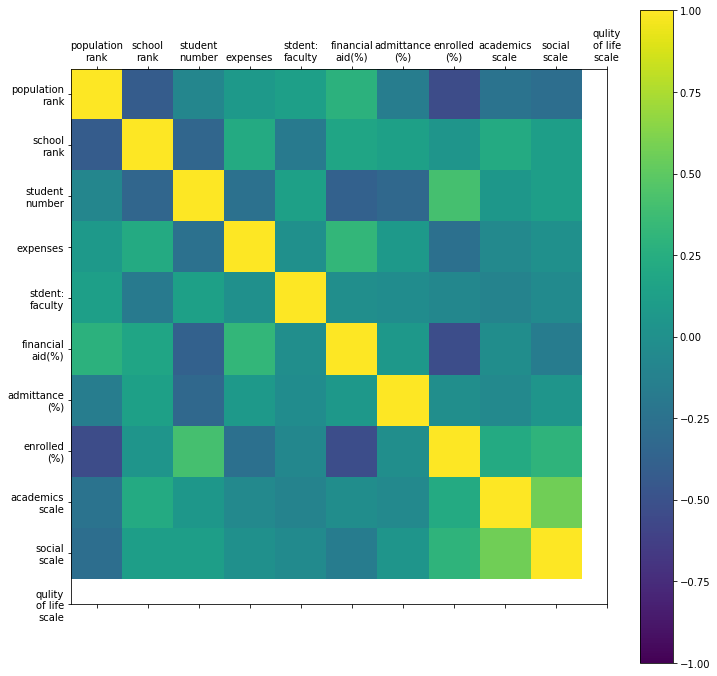

In [7]:
correlations = data.corr()  #计算变量之间的相关系数矩阵
names = ['population\nrank', 'school\nrank', 'student\nnumber', 'expenses', 'stdent:\nfaculty', 'financial\naid(%)',
         'admittance\n(%)', 'enrolled\n(%)', 'academics\nscale', 'social\nscale','qulity\nof life\nscale']
# plot correlation matrix
fig = plt.figure(figsize=(12,12)) #调用figure创建一个绘图对象
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)  #绘制热力图，从-1到1
fig.colorbar(cax)  #将matshow生成热力图设置为颜色渐变条
ticks = np.arange(0,11,1) #生成0-9，步长为1
ax.set_xticks(ticks)  #生成刻度
ax.set_yticks(ticks)
ax.set_xticklabels(names) #生成x轴标签
ax.set_yticklabels(names)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

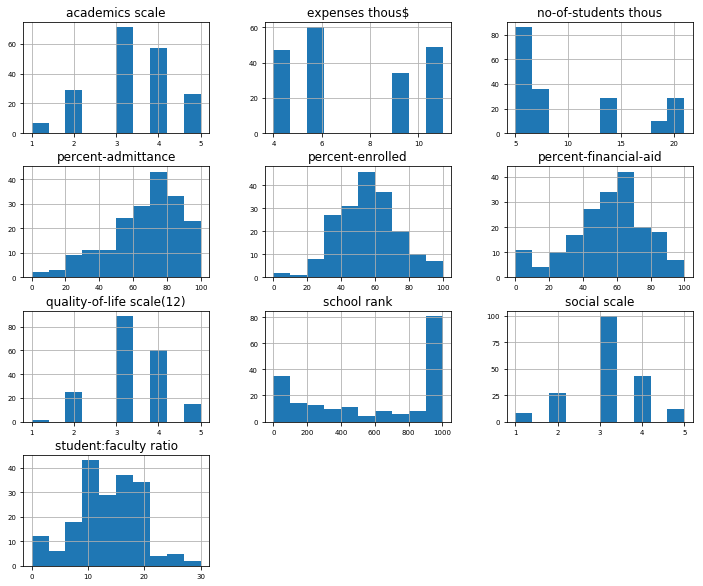

In [8]:
data.hist(xlabelsize=7,ylabelsize=7,figsize=(12,10))
plt.show

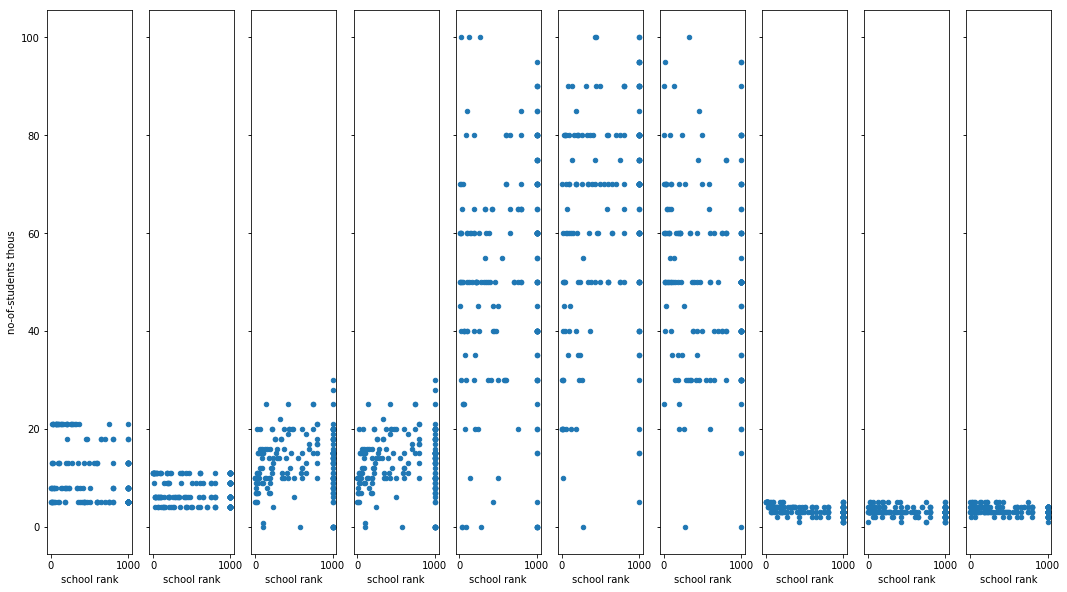

In [39]:
plt.close()
fig, axs = plt.subplots(1,10, sharey=True)
data.plot(kind='scatter', y='no-of-students thous', x='school rank', ax=axs[0], figsize=(18, 10))
data.plot(kind='scatter', y='expenses thous$', x='school rank', ax=axs[1])
data.plot(kind='scatter', y='student:faculty ratio', x='school rank', ax=axs[2])
data.plot(kind='scatter', y='student:faculty ratio', x='school rank', ax=axs[3])
data.plot(kind='scatter', y='percent-financial-aid', x='school rank', ax=axs[4])
data.plot(kind='scatter', y='percent-admittance', x='school rank', ax=axs[5])
data.plot(kind='scatter', y='percent-enrolled', x='school rank', ax=axs[6])
data.plot(kind='scatter', y='academics scale', x='school rank', ax=axs[7])
data.plot(kind='scatter', y='social scale', x='school rank', ax=axs[8])
data.plot(kind='scatter', y='quality-of-life scale(12)', x='school rank', ax=axs[9])
plt.show()